<center>
<h4>Diplomatura AACSyA 2018 - FaMAF - UNC</h4>
<h1>Aprendizaje No Supervisado</h1>
<h2>Práctico 1 - Clustering</h2>
<hr>
Por David Gonzalez <leonardo.david.gonzalez@gmail.com> y Facundo Díaz Cobos <facundo.diaz.cobos@gmail.com>
</center>
<br/>

## Objetivos
En este práctico se explorarán diferentes soluciones de clustering, para desarrollar las capacidades de análisis de
soluciones de clustering. Es preferible que los conjuntos de datos con los que trabajar sean propios, ya que de esta
forma podrán aplicar su conocimiento del dominio en la interpretación de las diferentes soluciones. Alternativa-
mente, pueden usar conjuntos de datos de los ejemplos de la materia.
En los mismos, hacer una breve discusión del problema y explicar cómo puede ser útil usar técnicas de clustering.

# Consignas
Para cumplir los objetivos, realizar las siguientes actividades:

1 - Explorar soluciones con diferentes parámetros y compararlas. Por ejemplo, variar el número de clusters, las
métricas de distancia, el número de iteraciones o el número de veces que se inicializan las semillas. Describir
brevemente: número de clusters, población de cada cluster, algunas caracterı́sticas distintivas de cada cluster,
algunos elementos que se puedan encontrar en cada cluster.

2 - Incorporar un embedding como preproceso a los datos, aplicar los algoritmos de clustering después de ese
preproceso y describir la solución o soluciones resultantes, discutiendo las ventajas que resultan. Se pueden
usar:

◦ Principal
Component Analysis http://scikit-learn.org/stable/modules/generated/sklearn.
decomposition.PCA.html

◦ para texto, embeddings neuronales Gensim https://pypi.org/project/gensim/

◦ para texto, embeddings neuronales Fastext https://pypi.org/project/fasttext/

3 - Proponer (y en lo posible, implementar) métricas de evaluación de soluciones de clustering basadas en testigos.
Los testigos son pares de objetos que un experto de dominio etiqueta como “deberı́an estar en el mismo cluster”
o “deberı́an estar en distintos clusters”.

4 - El método k-means de scikit-learn no provee una forma sencilla de obtneer los objetos más cercanos al centroide
de un cluster. Proponga alguna forma de obtener una muestra de los elementos de un cluster que sean cercanos
al centroide, por ejemplo, usando clasificadores, usando distancia coseno, etc. En lo posible, implementarlos y
mostrar esos elementos, discutir la representatividad de los elementos encontrados.

# <u>RESOLUCIÓN</u>

# Importando los datos:
Vamos a trabajar un set de datos correspondiente a compras reales de clientes realizadas en el año 2017. Los clientes fueron anonimizados previamente para poder ser utilizados en el ejercicio.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from yellowbrick.cluster.elbow import KElbowVisualizer
from sklearn.cluster import KMeans
from datetime import datetime

import numpy as np
np.random.seed(0)

# Configuramos el tamaño de los gráficos, en pulgadas
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10

In [2]:
from util import check_dataset
check_dataset()

* Chequeando dataset de trabajo...
- Dataset OK.


In [3]:
from util import load_dataset
ventas_df = load_dataset()

* Importando dataset...
 - 1677680 registros importados.


# 1 - Explorar soluciones con diferentes parámetros y compararlas:

In [4]:
from IPython.display import display, HTML

In [5]:
display(HTML('<b>* Cantidad de Features: {0}</b>'.format(len(ventas_df.columns))))
display(ventas_df.columns)
display(ventas_df.head())

Index(['Unnamed: 0', 'CODIGO_CLIENTE', 'RAZON_SOCIAL', 'CUIT', 'CATEGORIA_IVA',
       'GRUPO_CANAL', 'CANAL', 'SUBCANAL', 'APERTURA_ADICIONAL', 'CATEGORIA',
       'ZONA', 'ZONA_REPARTO', 'CONDICION_VENTA', 'CREDITO_MAXIMO',
       'CREDITO_MONEDA', 'LISTA_PRECIOS', 'AGENTE_RETENCION',
       'DIAS_TOLERANCIA_COBRO', 'GRUPO', 'SOCIEDAD_JURIDICA', 'ESTADO',
       'MOTIVO_ESTADO', 'ESQUEMA_COMERCIAL', 'FACTURA_CODIGO',
       'FACTURA_NUM_ID', 'FACTURA_SUCURSAL', 'FACTURA_FECHA',
       'FACTURA_MONTO_TOTAL', 'FACTURA_COND_VENTA', 'FACTURA_VENDEDOR',
       'CODIGO_ARTICULO', 'AGRUPACION_1', 'AGRUPACION_2', 'AGRUPACION_3',
       'AGRUPACION_4', 'AGRUPACION_5', 'AGRUPACION_6', 'CANTIDAD',
       'UNIDAD_MEDIDA', 'PRECIO_UNITARIO', 'PRECIO_TOTAL'],
      dtype='object')

,Unnamed: 0,CODIGO_CLIENTE,RAZON_SOCIAL,CUIT,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,...,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
0,0,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,...,012,122,253,012,080,001,1.0,UN,21.5519,26.08
1,1,c4798d1002b95e5b0f16f09c62c95e06,ec7c2a1bd7b6b3c9d195ed52ae5d7569,6505d3facde2c86923a7339db59a21ec,RM,000,010,010,010,A,...,012,425,700,012,080,001,1.0,UN,10.4264,12.62
2,2,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,RI,100,100,106,106,C,...,003,185,220,003,033,001,6.0,UN,15.0361,109.16
3,3,75eed0dd5091ba851cb1082f5c600404,5e09c84900842536972d00dc670c3fbc,c1660dedd01d4e5c55d3e9f5d549536d,RI,100,100,106,106,C,...,091,034,101,003,021,001,12.0,UN,8.0380,116.72
4,4,d7b59972e86f00e016b54288826786ae,24dc84bc7bc604e81717f2356fbd278b,4334910e09a671816fe006c0d9b9beb8,RM,000,010,010,010,A,...,012,302,402,012,126,001,6.0,UN,14.3429,104.13


In [6]:
display(HTML('<b>* Cantidad de Clientes: {0}</b>'.format(len(ventas_df.CODIGO_CLIENTE.unique()))))
display(HTML('<b>* Cantidad de Facturas emitidas: {0}</b>'.format(len(ventas_df.FACTURA_NUM_ID.unique()))))
display(HTML('<b>* Cantidad de Artículos diferentes Vendidos: {0}</b>'.format(len(ventas_df.CODIGO_ARTICULO.unique()))))

# Clusterizaremos clientes por su comportamiento de compra:

CASO PROPUESTO: El experto de dominio necesita saber cuales son los clientes que poseen comportamiento de compra similar en el año 2017.  

Configuramos el dataset para contemplar lo solicitado:

In [7]:

data_df = ventas_df[['CODIGO_CLIENTE', 'CANAL', 'SUBCANAL', 'FACTURA_NUM_ID','FACTURA_FECHA', 'CODIGO_ARTICULO', 'CANTIDAD', 'PRECIO_TOTAL' ]] 
data_df.insert( 1,'YEAR', data_df['FACTURA_FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d 00:00:00').year ))
data_df.insert( 2,'MONTH', data_df['FACTURA_FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d 00:00:00').month  ))
data_df.insert( 3,'DAY', data_df['FACTURA_FECHA'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d 00:00:00').day ))
data_df = data_df.drop(columns='FACTURA_FECHA')
data_df = data_df[data_df['YEAR'] == 2017]


In [8]:
display(data_df.head())
display(str(len(data_df)) + ' registros')


,CODIGO_CLIENTE,YEAR,MONTH,DAY,CANAL,SUBCANAL,FACTURA_NUM_ID,CODIGO_ARTICULO,CANTIDAD,PRECIO_TOTAL
0,c4798d1002b95e5b0f16f09c62c95e06,2017,1,2,010,010,297574e436e7466386da63886436195b,000-000-6673,1.0,26.08
1,c4798d1002b95e5b0f16f09c62c95e06,2017,1,2,010,010,297574e436e7466386da63886436195b,000-000-11000,1.0,12.62
2,75eed0dd5091ba851cb1082f5c600404,2017,1,2,100,106,44cd8f14e89c775c390d2d282735057a,000-000-9800,6.0,109.16
3,75eed0dd5091ba851cb1082f5c600404,2017,1,2,100,106,44cd8f14e89c775c390d2d282735057a,000-000-6742,12.0,116.72
4,d7b59972e86f00e016b54288826786ae,2017,1,2,010,010,e9db0c1d04bba69d87e81808c012272a,000-000-11557,6.0,104.13


'1480510 registros'

# Analisis previo de datos

Obtenemos la cantidad de ventas por mes realizadas a cada cliente. Esto se hace viendo los días de venta distintos 

In [9]:
ppc_df = ( data_df[['CODIGO_CLIENTE', 'MONTH', 'CODIGO_ARTICULO', 'CANTIDAD', 'PRECIO_TOTAL']]
        .groupby(['MONTH', 'CODIGO_ARTICULO'])
        .agg({ 'CODIGO_CLIENTE':'nunique', 'CANTIDAD': 'sum', 'PRECIO_TOTAL': 'sum' })        
        .reset_index()
        .rename(columns={'CODIGO_CLIENTE':'CANTIDAD_CLIENTES', 'CANTIDAD':'UNIDADES_VENDIDAS', 'PRECIO_TOTAL':'MONTO_TOTAL'})
    )    

In [10]:
ppc_df.head()

,MONTH,CODIGO_ARTICULO,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL
0,1,000-000-0236,2,3.0,157.83
1,1,000-000-0241,30,280.0,4040.96
2,1,000-000-0245,7,50.0,813.36
3,1,000-000-0248,12,92.0,1593.02
4,1,000-000-0256,41,581.0,13131.07


In [11]:
# OBTENEMOS EL PRODUCT SCORE

clientes_norm = (ppc_df['CANTIDAD_CLIENTES']-ppc_df['CANTIDAD_CLIENTES'].min())/(ppc_df['CANTIDAD_CLIENTES'].max()-ppc_df['CANTIDAD_CLIENTES'].min())
unidades_norm = (ppc_df['UNIDADES_VENDIDAS']-ppc_df['UNIDADES_VENDIDAS'].min())/(ppc_df['UNIDADES_VENDIDAS'].max()-ppc_df['UNIDADES_VENDIDAS'].min())
monto_norm = (ppc_df['MONTO_TOTAL']-ppc_df['MONTO_TOTAL'].min())/(ppc_df['MONTO_TOTAL'].max()-ppc_df['MONTO_TOTAL'].min())

ppc_df['PRODUCT_SCORE'] = 3 / (1/clientes_norm + 1/unidades_norm + 1/monto_norm)


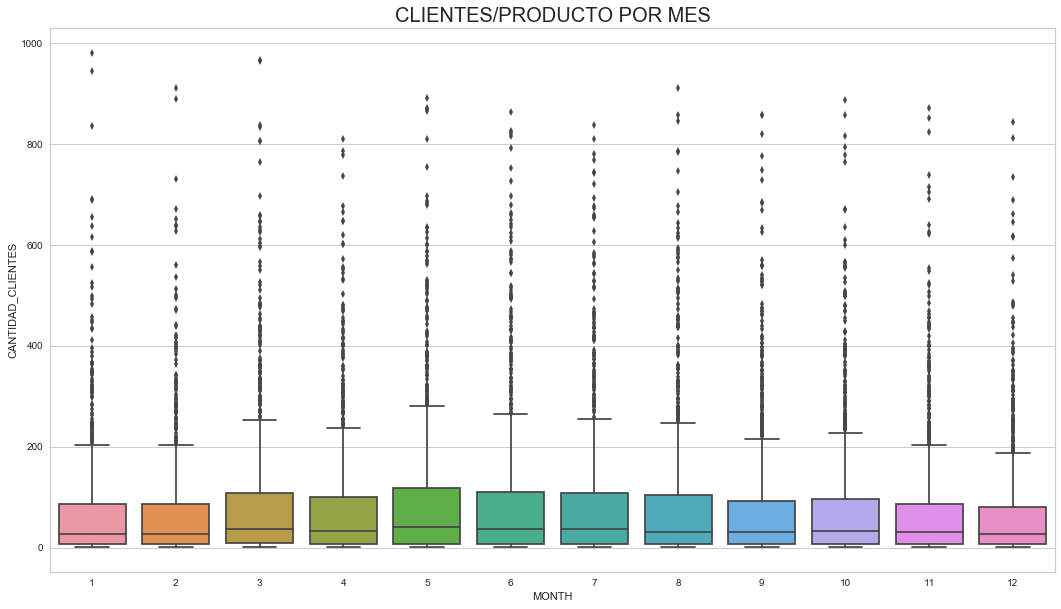

In [12]:
plt.clf()
sns.boxplot(x="MONTH", y="CANTIDAD_CLIENTES", data=ppc_df ).set_title("CLIENTES/PRODUCTO POR MES",fontsize=20);
plt.show()

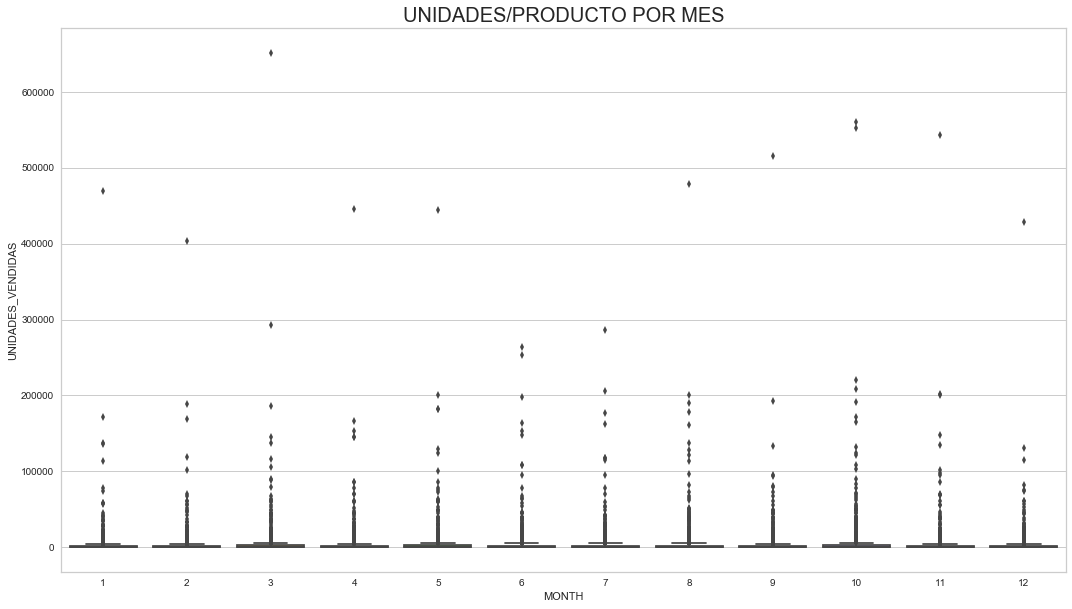

In [13]:
plt.clf()
sns.boxplot(x="MONTH", y="UNIDADES_VENDIDAS", data=ppc_df).set_title("UNIDADES/PRODUCTO POR MES",fontsize=20);
plt.show()


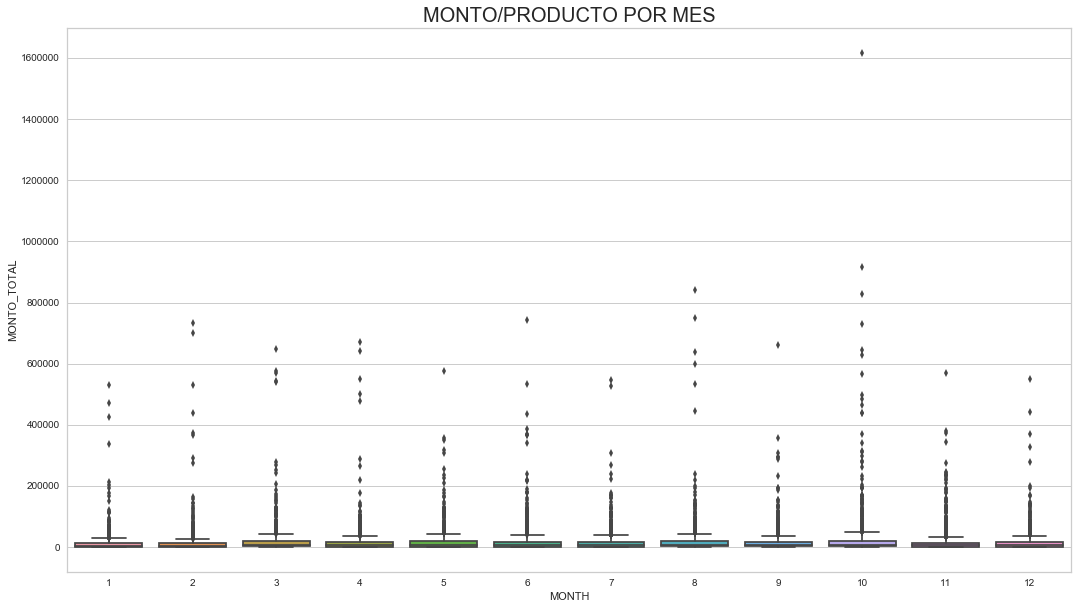

In [14]:
plt.clf()
sns.boxplot(x="MONTH", y="MONTO_TOTAL", data=ppc_df ).set_title("MONTO/PRODUCTO POR MES",fontsize=20);
plt.show()

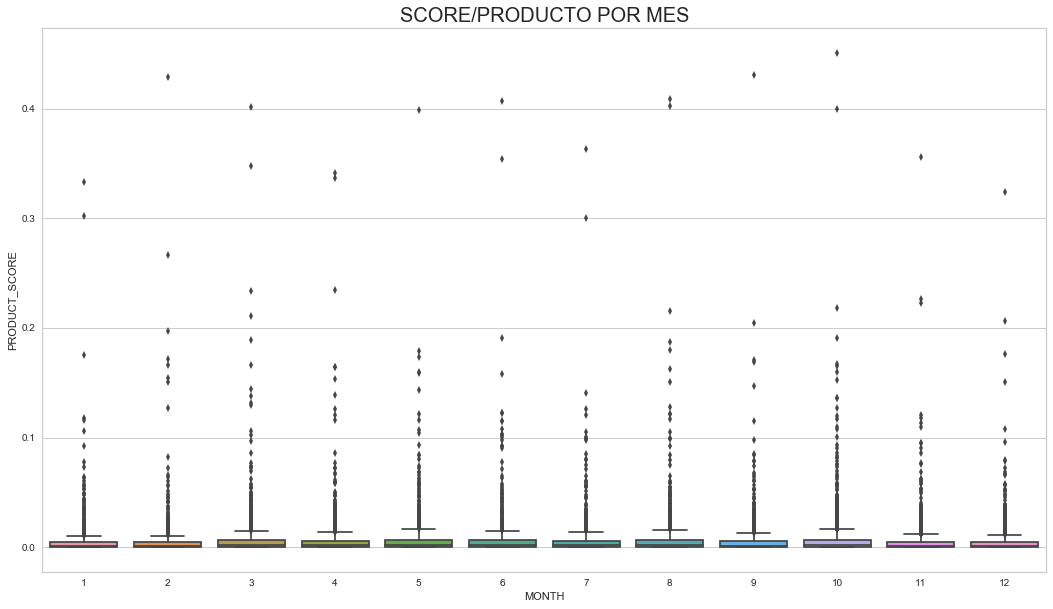

In [15]:
plt.clf()
sns.boxplot(x="MONTH", y="PRODUCT_SCORE", data=ppc_df).set_title("SCORE/PRODUCTO POR MES",fontsize=20);
plt.show()


In [16]:
display(len(ppc_df))

12807

In [17]:
with pd.option_context('display.float_format', lambda x: '{:,.3f}'.format(x)):
    display(ppc_df.PRODUCT_SCORE.describe())

count   12,807.000
mean         0.007
std          0.022
min          0.000
25%          0.000
50%          0.002
75%          0.006
max          0.451
Name: PRODUCT_SCORE, dtype: float64

# Eliminamos algunos outliers para mejorar la visualización:

In [18]:
# Removemos los outliers segun SCORE (que prioriza los tres valors de referencia) y revisamos:
ppc_r1_df = ppc_df[np.abs(ppc_df.PRODUCT_SCORE-ppc_df.PRODUCT_SCORE.mean()) <= (ppc_df.PRODUCT_SCORE.std()*3)]
display(len(ppc_r1_df))

12632

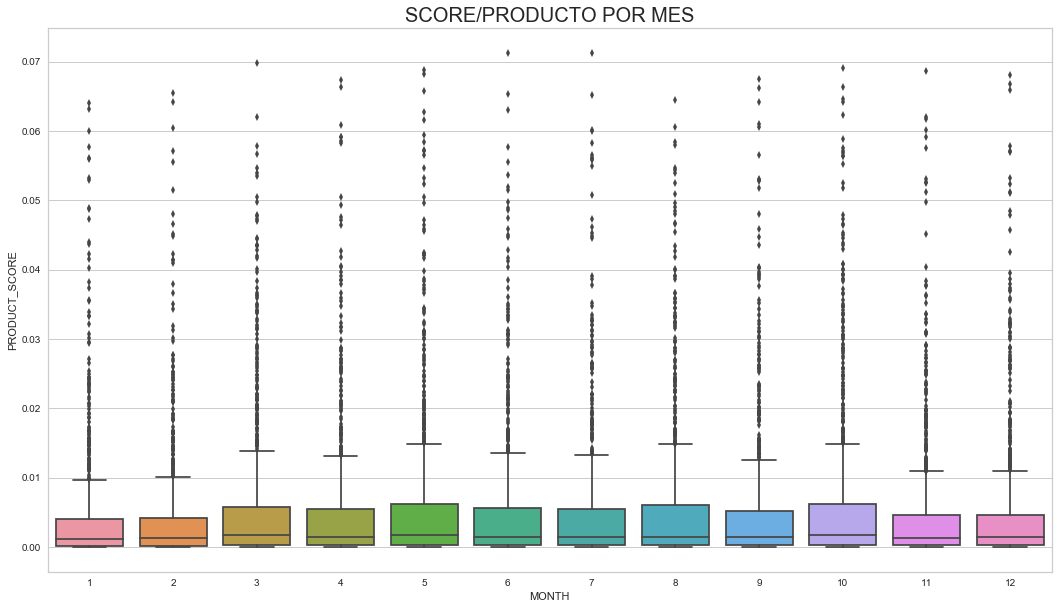

In [19]:
plt.clf()
sns.boxplot(x="MONTH", y="PRODUCT_SCORE", data=ppc_r1_df).set_title("SCORE/PRODUCTO POR MES",fontsize=20);
plt.show()

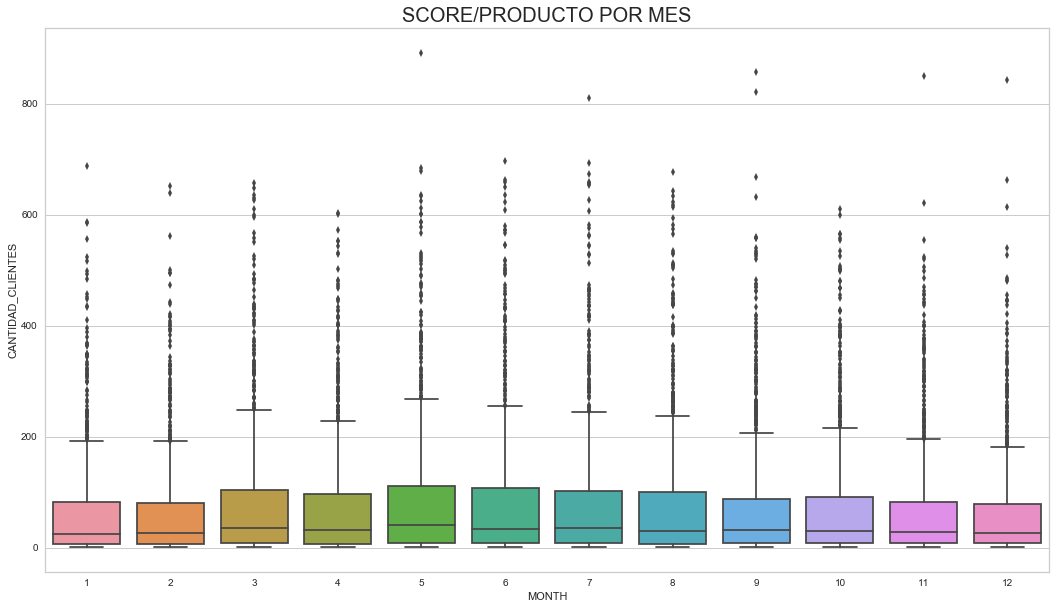

In [20]:
plt.clf()
sns.boxplot(x="MONTH", y="CANTIDAD_CLIENTES", data=ppc_r1_df).set_title("SCORE/PRODUCTO POR MES",fontsize=20);
plt.show()

In [21]:
for x in range(1, 13):
  m = ppc_r1_df[ppc_r1_df['MONTH']==x]
  pm = str(len(m))
  display( HTML('<H2>* PRODUCTOS MES ' + str(x) + ':</H2>') )
  display( m.describe() )  
  display( HTML('<hr/>') )

,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,978.0,978.000000,978.000000,978.000000,978.000000
mean,1.0,64.494888,2434.212384,10589.586708,0.004273
std,0.0,94.069512,8563.052905,18439.151289,0.008480
min,1.0,1.000000,1.000000,0.460000,0.000000
25%,1.0,7.000000,60.250000,1457.295000,0.000219
50%,1.0,25.000000,367.500000,4396.400000,0.001204
75%,1.0,82.000000,1400.000000,11716.295000,0.004003
max,1.0,689.000000,172080.000000,192665.030000,0.064081


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,968.0,968.000000,968.000000,968.000000,968.000000
mean,2.0,64.184917,2327.272839,11143.294318,0.004228
std,0.0,92.344606,8125.559953,20647.384102,0.008106
min,2.0,1.000000,1.000000,0.100000,0.000000
25%,2.0,7.000000,59.000000,1434.377500,0.000216
50%,2.0,27.000000,381.000000,4492.120000,0.001299
75%,2.0,81.250000,1453.000000,11472.765000,0.004201
max,2.0,652.000000,168840.000000,274052.480000,0.065476


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1053.0,1053.000000,1053.000000,1053.000000,1053.000000
mean,3.0,80.385565,2880.141214,15530.756477,0.005578
std,0.0,111.147204,8027.284186,24645.719876,0.009607
min,3.0,1.000000,1.000000,0.160000,0.000000
25%,3.0,8.000000,96.000000,2258.660000,0.000362
50%,3.0,36.000000,504.000000,6775.340000,0.001721
75%,3.0,104.000000,1996.000000,17907.450000,0.005825
max,3.0,658.000000,136800.000000,277870.940000,0.069889


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1010.0,1010.000000,1010.000000,1010.000000,1010.000000
mean,4.0,75.205941,2682.205501,12348.653475,0.004944
std,0.0,104.184345,8447.455424,18545.027028,0.009017
min,4.0,1.000000,1.000000,0.100000,0.000000
25%,4.0,7.000000,81.250000,1516.405000,0.000291
50%,4.0,32.000000,422.500000,5609.535000,0.001453
75%,4.0,96.000000,1766.250000,15163.945000,0.005434
max,4.0,603.000000,166440.000000,143963.830000,0.067410


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1004.0,1004.000000,1004.000000,1004.000000,1004.000000
mean,5.0,86.992032,3080.318613,15163.087799,0.005794
std,0.0,122.154520,9365.973987,25297.820799,0.010279
min,5.0,1.000000,1.000000,0.030000,0.000000
25%,5.0,8.000000,93.750000,1675.937500,0.000347
50%,5.0,40.000000,491.000000,6508.750000,0.001688
75%,5.0,112.000000,2063.500000,17770.380000,0.006194
max,5.0,892.000000,182742.000000,254672.380000,0.068780


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1019.0,1019.000000,1019.000000,1019.000000,1019.000000
mean,6.0,82.000000,2739.118406,15237.952856,0.005221
std,0.0,117.311744,7599.389195,28292.349576,0.009346
min,6.0,1.000000,1.000000,0.160000,0.000000
25%,6.0,8.000000,70.500000,1431.340000,0.000251
50%,6.0,34.000000,409.000000,6073.670000,0.001483
75%,6.0,107.000000,1850.000000,16178.215000,0.005658
max,6.0,697.000000,95280.000000,339329.750000,0.071254


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1001.0,1001.000000,1001.000000,1001.000000,1001.000000
mean,7.0,82.426573,2563.218479,14411.874655,0.005101
std,0.0,120.117871,6676.592056,25243.404785,0.009279
min,7.0,1.000000,1.000000,0.130000,0.000000
25%,7.0,8.000000,72.000000,1742.400000,0.000247
50%,7.0,35.000000,424.000000,5777.320000,0.001425
75%,7.0,103.000000,1879.000000,15277.960000,0.005515
max,7.0,810.000000,78165.000000,266937.320000,0.071283


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1072.0,1072.000000,1072.000000,1072.000000,1072.000000
mean,8.0,77.222015,3023.698798,15511.442789,0.005454
std,0.0,112.120563,10025.369619,24355.464174,0.009614
min,8.0,1.000000,1.000000,0.200000,0.000000
25%,8.0,7.000000,67.750000,1949.902500,0.000235
50%,8.0,30.000000,389.500000,6708.960000,0.001433
75%,8.0,101.000000,1950.250000,18517.730000,0.006099
max,8.0,677.000000,200160.000000,218121.650000,0.064425


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1117.0,1117.000000,1117.00000,1117.000000,1117.000000
mean,9.0,74.643688,2621.43842,13893.286876,0.004852
std,0.0,108.776341,7896.13183,25054.295224,0.008898
min,9.0,1.000000,1.00000,0.230000,0.000000
25%,9.0,8.000000,93.00000,1906.370000,0.000339
50%,9.0,31.000000,384.00000,5673.240000,0.001403
75%,9.0,88.000000,1642.00000,15571.310000,0.005262
max,9.0,857.000000,133080.00000,307282.880000,0.067557


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1168.0,1168.000000,1168.000000,1168.000000,1168.000000
mean,10.0,71.748288,3202.340088,20786.192543,0.005972
std,0.0,101.363024,9393.361875,48513.426892,0.010382
min,10.0,1.000000,1.000000,0.340000,0.000000
25%,10.0,8.000000,95.500000,2171.707500,0.000356
50%,10.0,29.500000,500.500000,7390.610000,0.001788
75%,10.0,91.000000,2274.000000,19649.635000,0.006189
max,10.0,610.000000,131730.000000,916499.890000,0.069045


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1152.0,1152.000000,1152.000000,1152.000000,1152.000000
mean,11.0,66.136285,2537.948688,15019.518863,0.004504
std,0.0,95.125385,9322.883988,31483.757411,0.008372
min,11.0,1.000000,1.000000,0.040000,0.000000
25%,11.0,8.000000,76.000000,1858.307500,0.000286
50%,11.0,29.000000,358.500000,5211.100000,0.001280
75%,11.0,83.000000,1485.000000,13873.362500,0.004565
max,11.0,851.000000,200880.000000,345195.870000,0.068727


,MONTH,CANTIDAD_CLIENTES,UNIDADES_VENDIDAS,MONTO_TOTAL,PRODUCT_SCORE
count,1090.0,1090.000000,1090.000000,1090.000000,1090.000000
mean,12.0,62.329358,2289.643848,14346.196339,0.004619
std,0.0,90.847751,6293.343912,23985.671953,0.008778
min,12.0,1.000000,1.000000,6.000000,0.000000
25%,12.0,8.000000,69.000000,1883.945000,0.000265
50%,12.0,27.000000,386.000000,6096.705000,0.001423
75%,12.0,78.000000,1510.000000,16023.755000,0.004559
max,12.0,844.000000,82080.000000,278731.700000,0.068071


# Generamos la tabla con los datos dispuestos para clusterizar

In [22]:
ppc_c_df = ( data_df[['CODIGO_CLIENTE', 'MONTH', 'CODIGO_ARTICULO', 'CANTIDAD']]
        .groupby(['CODIGO_CLIENTE', 'MONTH', 'CODIGO_ARTICULO'])
        .agg({ 'CANTIDAD': 'sum'})
        .reset_index()
        .rename(columns={'CANTIDAD':'UNIDADES_VENDIDAS'})
    )   

ppc_c_df.head()


,CODIGO_CLIENTE,MONTH,CODIGO_ARTICULO,UNIDADES_VENDIDAS
0,0024531e81828540871212e10c896d71,1,000-000-10161,24.0
1,0024531e81828540871212e10c896d71,1,000-000-10170,2.0
2,0024531e81828540871212e10c896d71,1,000-000-10204,7.0
3,0024531e81828540871212e10c896d71,1,000-000-10636,36.0
4,0024531e81828540871212e10c896d71,1,000-000-10637,18.0


In [65]:
# Ok, ahora obtenemos cantidades de productos por clientes en una matriz
ppcp_df = ppc_c_df.pivot_table(index='CODIGO_CLIENTE', columns=['CODIGO_ARTICULO', 'MONTH'], values='UNIDADES_VENDIDAS').fillna(0)

In [66]:
ppcp_df.shape

(2443, 12807)

In [25]:
ppcp_df.head()

CODIGO_ARTICULO                  000-000-0236                                \
MONTH                                      1    2    3    4    5    6    7    
CODIGO_CLIENTE                                                                
0024531e81828540871212e10c896d71          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
003c44afe6e90ba8848dfd2bdd92c03f          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
004a4de5dd7ab3c72b8f86fe635bb9b8          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
00a1e834d044753f4e47964143a5e904          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
00bb302b07a498a606e061579e962c45          0.0  0.0  0.0  0.0  0.0  0.0  0.0   

CODIGO_ARTICULO                            000-000-0241      ...       \
MONTH                              8    9            1       ...        
CODIGO_CLIENTE                                               ...        
0024531e81828540871212e10c896d71  0.0  0.0          0.0      ...        
003c44afe6e90ba8848dfd2bdd92c03f  0.0  0.0          0.0      ...        
004a4de5dd7ab3c72b8f86fe635bb9b8  0.0  0.0          0.0      ...        
00a1e834d044753f4e47964143a5e904  0.0  0.0          0.0      ...        
00bb302b07a498a606e061579e962c45  0.0  0.0          0.0      ...        

CODIGO_ARTICULO                  000-999-c11857      000-999-c3436            \
MONTH                                        10   11            8    9    10   
CODIGO_CLIENTE                                                                 
0024531e81828540871212e10c896d71            0.0  0.0           0.0  0.0  0.0   
003c44afe6e90ba8848dfd2bdd92c03f            0.0  0.0           0.0  0.0  0.0   
004a4de5dd7ab3c72b8f86fe635bb9b8            0.0  0.0           0.0  0.0  0.0   
00a1e834d044753f4e47964143a5e904            0.0  0.0           0.0  0.0  0.0   
00bb302b07a498a606e061579e962c45            0.0  0.0           0.0  0.0  0.0   

CODIGO_ARTICULO                  000-999-c3747           000-999-d4532  \
MONTH                                       9    10   11            4    
CODIGO_CLIENTE                                                           
0024531e81828540871212e10c896d71           0.0  0.0  0.0           0.0   
003c44afe6e90ba8848dfd2bdd92c03f           0.0  0.0  0.0           0.0   
004a4de5dd7ab3c72b8f86fe635bb9b8           0.0  0.0  0.0           0.0   
00a1e834d044753f4e47964143a5e904           0.0  0.0  0.0           0.0   
00bb302b07a498a606e061579e962c45           0.0  0.0  0.0           0.0   

CODIGO_ARTICULO                  000-999-d5883  
MONTH                                       4   
CODIGO_CLIENTE                                  
0024531e81828540871212e10c896d71           0.0  
003c44afe6e90ba8848dfd2bdd92c03f           0.0  
004a4de5dd7ab3c72b8f86fe635bb9b8           0.0  
00a1e834d044753f4e47964143a5e904           0.0  
00bb302b07a498a606e061579e962c45           0.0  

[5 rows x 12807 columns]

In [69]:
# Normalizamos los datos
ppcp_norm=(ppcp_df-ppcp_df.min())/(ppcp_df.max()-ppcp_df.min())

In [70]:
ppcp_norm.describe()

CODIGO_ARTICULO 000-000-0236                                         \
MONTH                     1            2            3            4    
count            2443.000000  2443.000000  2443.000000  2443.000000   
mean                0.000614     0.001228     0.000614     0.000614   
std                 0.022616     0.030329     0.022616     0.022616   
min                 0.000000     0.000000     0.000000     0.000000   
25%                 0.000000     0.000000     0.000000     0.000000   
50%                 0.000000     0.000000     0.000000     0.000000   
75%                 0.000000     0.000000     0.000000     0.000000   
max                 1.000000     1.000000     1.000000     1.000000   

CODIGO_ARTICULO                                                      \
MONTH                     5            6            7            8    
count            2443.000000  2443.000000  2443.000000  2443.000000   
mean                0.000682     0.001228     0.001023     0.001330   
std                 0.024311     0.028592     0.026750     0.030744   
min                 0.000000     0.000000     0.000000     0.000000   
25%                 0.000000     0.000000     0.000000     0.000000   
50%                 0.000000     0.000000     0.000000     0.000000   
75%                 0.000000     0.000000     0.000000     0.000000   
max                 1.000000     1.000000     1.000000     1.000000   

CODIGO_ARTICULO              000-000-0241      ...      000-999-c11857  \
MONTH                     9            1       ...                  10   
count            2443.000000  2443.000000      ...         2443.000000   
mean                0.001126     0.002388      ...            0.000989   
std                 0.027220     0.032421      ...            0.021174   
min                 0.000000     0.000000      ...            0.000000   
25%                 0.000000     0.000000      ...            0.000000   
50%                 0.000000     0.000000      ...            0.000000   
75%                 0.000000     0.000000      ...            0.000000   
max                 1.000000     1.000000      ...            1.000000   

CODIGO_ARTICULO              000-999-c3436                            \
MONTH                     11            8            9            10   
count            2443.000000    2443.00000  2443.000000  2443.000000   
mean                0.000409       0.00174     0.001364     0.003582   
std                 0.020232       0.02623     0.024194     0.044248   
min                 0.000000       0.00000     0.000000     0.000000   
25%                 0.000000       0.00000     0.000000     0.000000   
50%                 0.000000       0.00000     0.000000     0.000000   
75%                 0.000000       0.00000     0.000000     0.000000   
max                 1.000000       1.00000     1.000000     1.000000   

CODIGO_ARTICULO 000-999-c3747                           000-999-d4532  \
MONTH                      9            10           11            4    
count             2443.000000  2443.000000  2443.000000   2443.000000   
mean                 0.001228     0.000563     0.000512      0.000921   
std                  0.035028     0.020490     0.020543      0.025024   
min                  0.000000     0.000000     0.000000      0.000000   
25%                  0.000000     0.000000     0.000000      0.000000   
50%                  0.000000     0.000000     0.000000      0.000000   
75%                  0.000000     0.000000     0.000000      0.000000   
max                  1.000000     1.000000     1.000000      1.000000   

CODIGO_ARTICULO 000-999-d5883  
MONTH                      4   
count             2443.000000  
mean                 0.000782  
std                  0.022234  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  0.000000  
max                  1.000000  

[8 rows x 12807 columns]

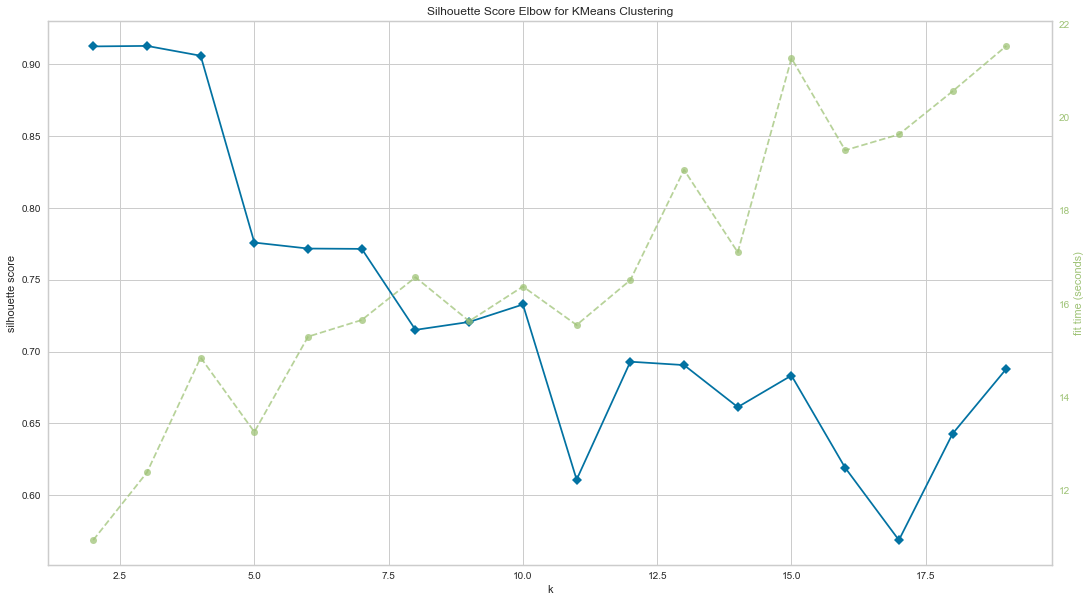

In [28]:
# Clusterizamos los clientes segun la similaridad de los productos que compran
plt.clf()
clusterClientes = KElbowVisualizer(KMeans(), k=(2,20), metric='silhouette')
clusterClientes.fit(ppcp_norm)
clusterClientes.poof()
plt.show()

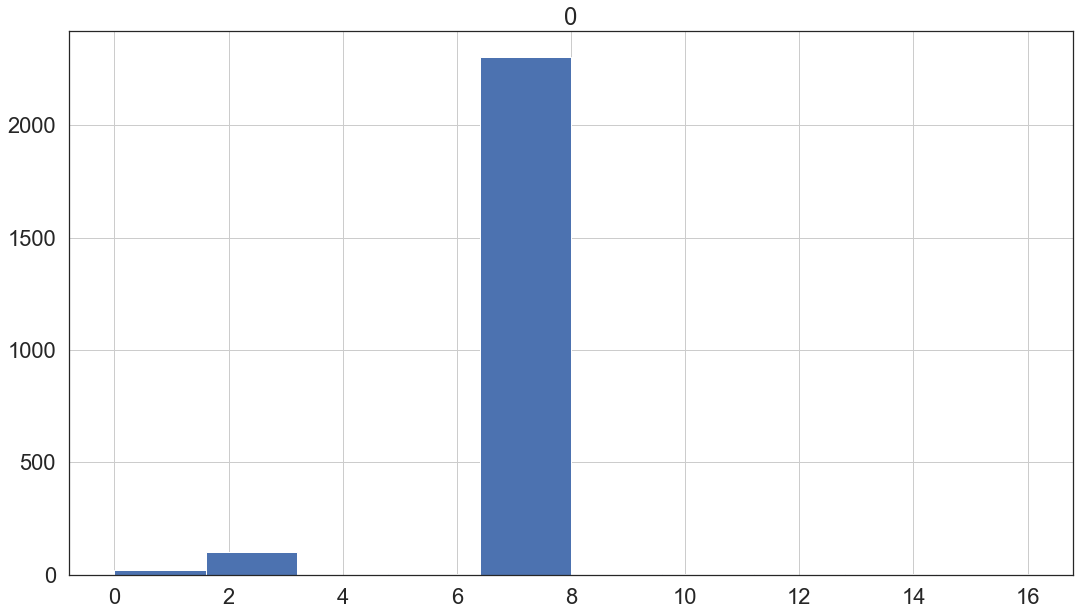

In [59]:
num_clusters = 17


# Ejecutamos la clusterización por la cantidad de clusters seleccionada:

np.random.seed(0)
ppcp_kmeans = KMeans(n_clusters=num_clusters)
#ppcp_df['CLUSTER'] = ppcp_kmeans.fit_predict(ppcp_norm)
ppcp_clusters = ppcp_kmeans.fit_predict(ppcp_norm)

pd.DataFrame(ppcp_clusters).hist()
plt.show()

Se generaron grupos pero estan muy desbalanceados. Veremos de reducir la dimensionalidad y reintentaremos.

# 2 - Incorporar un embedding como preproceso a los datos:

In [30]:
# DROP labels with no information
df = ventas_df
df = df.drop(['CODIGO_CLIENTE', 'CUIT', 'RAZON_SOCIAL','FACTURA_CODIGO', 'Unnamed: 0', 'LISTA_PRECIOS'], axis=1)
df = df.drop(['CODIGO_ARTICULO', 'FACTURA_VENDEDOR', 'FACTURA_COND_VENTA','FACTURA_FECHA', 'FACTURA_NUM_ID', 'ZONA_REPARTO', 'ZONA'], axis=1)


df[:3]

,CATEGORIA_IVA,GRUPO_CANAL,CANAL,SUBCANAL,APERTURA_ADICIONAL,CATEGORIA,CONDICION_VENTA,CREDITO_MAXIMO,CREDITO_MONEDA,AGENTE_RETENCION,...,AGRUPACION_1,AGRUPACION_2,AGRUPACION_3,AGRUPACION_4,AGRUPACION_5,AGRUPACION_6,CANTIDAD,UNIDAD_MEDIDA,PRECIO_UNITARIO,PRECIO_TOTAL
0,RM,000,010,010,010,A,07,0.0,PES,False,...,012,122,253,012,080,001,1.0,UN,21.5519,26.08
1,RM,000,010,010,010,A,07,0.0,PES,False,...,012,425,700,012,080,001,1.0,UN,10.4264,12.62
2,RI,100,100,106,106,C,14,0.0,PES,False,...,003,185,220,003,033,001,6.0,UN,15.0361,109.16


In [ ]:
from sklearn import preprocessing

# Create a label (category) encoder object
le_cat_iva = preprocessing.LabelEncoder()
le_cat = preprocessing.LabelEncoder()
le_cred_mon = preprocessing.LabelEncoder()
le_soc_jur = preprocessing.LabelEncoder()
le_estado = preprocessing.LabelEncoder()
le_mot_estado = preprocessing.LabelEncoder()
le_esq_com = preprocessing.LabelEncoder()
le_fac_cod = preprocessing.LabelEncoder()
le_uni_med = preprocessing.LabelEncoder()

le_ag_1 = preprocessing.LabelEncoder()
le_ag_2 = preprocessing.LabelEncoder()
le_ag_3 = preprocessing.LabelEncoder()
le_ag_4 = preprocessing.LabelEncoder()
le_ag_5 = preprocessing.LabelEncoder()
le_ag_6 = preprocessing.LabelEncoder()
le_con_venta = preprocessing.LabelEncoder()
le_grupo = preprocessing.LabelEncoder()
le_grupo_canal = preprocessing.LabelEncoder()
le_canal = preprocessing.LabelEncoder()
le_subcanal = preprocessing.LabelEncoder()
le_apertura_adicional = preprocessing.LabelEncoder()


# Fit the encoder to the pandas column
le_cat_iva.fit(df["CATEGORIA_IVA"])
le_cat.fit(df["CATEGORIA"])
le_estado.fit(df["ESTADO"])
le_uni_med.fit(df["UNIDAD_MEDIDA"])
le_esq_com.fit(df["ESQUEMA_COMERCIAL"].astype(str))
le_mot_estado.fit(df["MOTIVO_ESTADO"].astype(str))
le_cred_mon.fit(df["CREDITO_MONEDA"].astype(str))
le_soc_jur.fit(df["SOCIEDAD_JURIDICA"].astype(str))

le_ag_1.fit(df['AGRUPACION_1'].astype(str)) 
le_ag_2.fit(df['AGRUPACION_2'].astype(str)) 
le_ag_3.fit(df['AGRUPACION_3'].astype(str)) 
le_ag_4.fit(df['AGRUPACION_4'].astype(str)) 
le_ag_5.fit(df['AGRUPACION_5'].astype(str)) 
le_ag_6.fit(df['AGRUPACION_6'].astype(str)) 
le_con_venta.fit(df["CONDICION_VENTA"])
le_grupo.fit(df["GRUPO"])
le_grupo_canal.fit(df["GRUPO_CANAL"])
le_canal.fit(df["CANAL"])
le_subcanal.fit(df["SUBCANAL"])
le_apertura_adicional.fit(df["APERTURA_ADICIONAL"])

# Apply the fitted encoder to the pandas column
df["CATEGORIA_IVA"] = le_cat_iva.transform(df["CATEGORIA_IVA"]) 
df["CATEGORIA"] = le_cat.transform(df["CATEGORIA"]) 
df["ESTADO"] = le_estado.transform(df["ESTADO"]) 
df["UNIDAD_MEDIDA"] = le_uni_med.transform(df["UNIDAD_MEDIDA"]) 
df["ESQUEMA_COMERCIAL"] = le_esq_com.transform(df["ESQUEMA_COMERCIAL"].astype(str)) 
df["MOTIVO_ESTADO"] = le_mot_estado.transform(df["MOTIVO_ESTADO"].astype(str)) 
df["CREDITO_MONEDA"] = le_cred_mon.transform(df["CREDITO_MONEDA"].astype(str)) 
df["SOCIEDAD_JURIDICA"] = le_soc_jur.transform(df["SOCIEDAD_JURIDICA"].astype(str)) 

df['AGRUPACION_1'] = le_ag_1.transform(df['AGRUPACION_1'].astype(str)) 
df['AGRUPACION_2'] = le_ag_2.transform(df['AGRUPACION_2'].astype(str)) 
df['AGRUPACION_3'] = le_ag_3.transform(df['AGRUPACION_3'].astype(str)) 
df['AGRUPACION_4'] = le_ag_4.transform(df['AGRUPACION_4'].astype(str)) 
df['AGRUPACION_5'] = le_ag_5.transform(df['AGRUPACION_5'].astype(str)) 
df['AGRUPACION_6'] = le_ag_6.transform(df['AGRUPACION_6'].astype(str)) 
df["CONDICION_VENTA"] = le_con_venta.transform(df["CONDICION_VENTA"])
df["GRUPO"] = le_grupo.transform(df["GRUPO"])
df["GRUPO_CANAL"] = le_grupo_canal.transform(df["GRUPO_CANAL"])
df["CANAL"] = le_canal.transform(df["CANAL"])
df["SUBCANAL"] = le_subcanal.transform(df["SUBCANAL"])
df["APERTURA_ADICIONAL"] = le_apertura_adicional.transform(df["APERTURA_ADICIONAL"])


In [ ]:
df[:3]

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn

# vemos la correlacion entre los features
df_corr = df.corr()
df_corr

In [ ]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [ ]:
# Aqui podemos ver que algunas features tiene mucha correlacion entre si, como SOCIEDAD_JURIDICA y ser AGENTE_RETENCION.
# Lo mismo sucede con FACTURA_MONTO_TOTAL, CANTIDAD y PRECIO_TOTAL Y LAS AGRUPACIONES
# ESTADO Y MOTIVO_ESTADO
# Por lo que vamos a aplicar una técnica de embedding, PCA (Principal component analisis)

pca = PCA(n_components=17)
pca.fit(df)
df_reduced_pca = pca.transform(df)

In [ ]:
df_corr.columns

In [ ]:
import numpy as np
# Vamos a volver a generar otro mapa de calor, par ver si la correlacion bajo y el PCA fue efectivo. 1677679
df_red =  pd.DataFrame(data=df_reduced_pca, columns=range(df_reduced_pca.shape[1]))
df_red.reset_index
df_red

In [ ]:
#Generamos un nuevo mapa de calor para ver corroborar que la correlacion entre columnas es baja!
# y efectivamente este metodo nos ayudo a reducir dimencionalidad sin tanta perdida de informacion
# ya que ahora estamos en otro espacio, sin tanta perdida de informacion

df_red_corr = df_red.corr()
plt.figure(figsize=(15,10))
seaborn.heatmap(df_red_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

# 3 - Proponer métricas de evaluación de soluciones de clustering basadas en testigos:

In [ ]:
# Esto si podes fijate vos.

# 4 - Proponga alguna forma de obtener una muestra de los elementos de un cluster que sean cercanos al centroide:

In [71]:
ppcp_norm.head()

CODIGO_ARTICULO                  000-000-0236                                \
MONTH                                      1    2    3    4    5    6    7    
CODIGO_CLIENTE                                                                
0024531e81828540871212e10c896d71          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
003c44afe6e90ba8848dfd2bdd92c03f          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
004a4de5dd7ab3c72b8f86fe635bb9b8          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
00a1e834d044753f4e47964143a5e904          0.0  0.0  0.0  0.0  0.0  0.0  0.0   
00bb302b07a498a606e061579e962c45          0.0  0.0  0.0  0.0  0.0  0.0  0.0   

CODIGO_ARTICULO                            000-000-0241      ...       \
MONTH                              8    9            1       ...        
CODIGO_CLIENTE                                               ...        
0024531e81828540871212e10c896d71  0.0  0.0          0.0      ...        
003c44afe6e90ba8848dfd2bdd92c03f  0.0  0.0          0.0      ...        
004a4de5dd7ab3c72b8f86fe635bb9b8  0.0  0.0          0.0      ...        
00a1e834d044753f4e47964143a5e904  0.0  0.0          0.0      ...        
00bb302b07a498a606e061579e962c45  0.0  0.0          0.0      ...        

CODIGO_ARTICULO                  000-999-c11857      000-999-c3436            \
MONTH                                        10   11            8    9    10   
CODIGO_CLIENTE                                                                 
0024531e81828540871212e10c896d71            0.0  0.0           0.0  0.0  0.0   
003c44afe6e90ba8848dfd2bdd92c03f            0.0  0.0           0.0  0.0  0.0   
004a4de5dd7ab3c72b8f86fe635bb9b8            0.0  0.0           0.0  0.0  0.0   
00a1e834d044753f4e47964143a5e904            0.0  0.0           0.0  0.0  0.0   
00bb302b07a498a606e061579e962c45            0.0  0.0           0.0  0.0  0.0   

CODIGO_ARTICULO                  000-999-c3747           000-999-d4532  \
MONTH                                       9    10   11            4    
CODIGO_CLIENTE                                                           
0024531e81828540871212e10c896d71           0.0  0.0  0.0           0.0   
003c44afe6e90ba8848dfd2bdd92c03f           0.0  0.0  0.0           0.0   
004a4de5dd7ab3c72b8f86fe635bb9b8           0.0  0.0  0.0           0.0   
00a1e834d044753f4e47964143a5e904           0.0  0.0  0.0           0.0   
00bb302b07a498a606e061579e962c45           0.0  0.0  0.0           0.0   

CODIGO_ARTICULO                  000-999-d5883  
MONTH                                       4   
CODIGO_CLIENTE                                  
0024531e81828540871212e10c896d71           0.0  
003c44afe6e90ba8848dfd2bdd92c03f           0.0  
004a4de5dd7ab3c72b8f86fe635bb9b8           0.0  
00a1e834d044753f4e47964143a5e904           0.0  
00bb302b07a498a606e061579e962c45           0.0  

[5 rows x 12807 columns]

In [79]:
# Obtenemos las distancias entre los elementos de los diferentes clusters
distances_kmeans = clusterClientes.transform(ppcp_norm)

# Obtenemos el listado de clientes mas cercanos al centroide de cada cluster
clientes_representativos = ppcp_norm.iloc[[ distances_kmeans[:,i].argmin() for i in range( num_clusters ) ]] 
clientes_representativos.insert( 0, 'CLUSTER',  range( num_clusters ) )

# Mostramos la lista de elementos mas representativos de cada cluster.
display(clientes_representativos[['CLUSTER']])

CODIGO_ARTICULO,CLUSTER
MONTH,
CODIGO_CLIENTE,
28c497e28744f5a3b5238e4b54874b08,0
5c0ffcefbc70e2f0742d5ef56e2a5419,1
27e042470462c15dd7bb6b9bdd35a0a3,2
8bd5f68a9c22b80dec1b0b7251aaddcf,3
3a1f3eb8aa38a1764a17572241317f35,4
75306f13542a9af0374a26e842ad735b,5
f21e906a1a246bcd430cdbd8f484563e,6
99f0d1677cf1712155beedd4caeca566,7
